In [2]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px

pd.set_option("display.max_colwidth", 100)

### Preprocessing

In [6]:
# EMBEDDINGS
embeddings = pd.read_csv("../outputs/fakeavceleb/fakeavceleb_forward_embeddings.csv", dtype={"video_name": str})
embeddings["video_name"] = embeddings["video_name"].str.lstrip("./storage/slurm/schnackl/fakesync/data/fakeavceleb/")
embeddings["audio_emb"] = embeddings["audio_emb"].apply(ast.literal_eval)
embeddings["video_emb"] = embeddings["video_emb"].apply(ast.literal_eval)
# concatenate audio and video embeddings
embeddings["emb"] = embeddings.apply(lambda row: row["audio_emb"] + row["video_emb"], axis=1)

embeddings.head(3)

video_name  \
0  FakeAVCeleb/RealVideo-RealAudio/African/men/id00076/00109.mp4   
1  FakeAVCeleb/RealVideo-RealAudio/African/men/id00166/00010.mp4   
2  FakeAVCeleb/RealVideo-RealAudio/African/men/id00366/00118.mp4   

                                                                                             audio_emb  \
0  [2.448158025741577, -0.7841128706932068, 0.5819520950317383, 0.6441744565963745, -0.193833813071...   
1  [2.3108363151550293, -0.8642218112945557, 0.8458362817764282, 0.7836560606956482, -0.01534956321...   
2  [2.4429855346679688, -0.6079837083816528, 0.6155825853347778, 0.6308673620223999, -0.43876469135...   

                                                                                             video_emb  \
0  [-0.1955173760652542, 0.009487382136285305, -0.2848970890045166, 0.08883369714021683, 0.64520633...   
1  [0.21191272139549255, 0.21384629607200623, -0.33494243025779724, -0.03003206104040146, 0.7071767...   
2  [-0.13135063648223877, 0.019138693809509277, -0.3041873574256897, 0.15831473469734192, 0.5472093...   

                                                                                                   emb  
0  [2.448158025741577, -0.7841128706932068, 0.5819520950317383, 0.6441744565963745, -0.193833813071...  
1  [2.3108363151550293, -0.8642218112945557, 0.8458362817764282, 0.7836560606956482, -0.01534956321...  
2  [2.4429855346679688, -0.6079837083816528, 0.6155825853347778, 0.6308673620223999, -0.43876469135...

In [7]:
# METADATA
metadata = pd.read_csv("/storage/slurm/schnackl/fakesync/data/fakeavceleb/FakeAVCeleb/meta_data.csv")
metadata.head(3)
# rename last col
metadata = metadata.rename(columns={"Unnamed: 9": "label"})
metadata["label"] = metadata["label"] + "/" + metadata["path"]

metadata.head(3)

source target1 target2 method category                 type     race  \
0  id00076       -       -   real        A  RealVideo-RealAudio  African   
1  id00166       -       -   real        A  RealVideo-RealAudio  African   
2  id00173       -       -   real        A  RealVideo-RealAudio  African   

  gender       path  \
0    men  00109.mp4   
1    men  00010.mp4   
2    men  00118.mp4   

                                                           label  
0  FakeAVCeleb/RealVideo-RealAudio/African/men/id00076/00109.mp4  
1  FakeAVCeleb/RealVideo-RealAudio/African/men/id00166/00010.mp4  
2  FakeAVCeleb/RealVideo-RealAudio/African/men/id00173/00118.mp4

In [11]:
df = pd.merge(embeddings, metadata, left_on="video_name", right_on="label", how="inner")
df.head(3)

video_name  \
0  FakeAVCeleb/RealVideo-RealAudio/African/men/id00076/00109.mp4   
1  FakeAVCeleb/RealVideo-RealAudio/African/men/id00166/00010.mp4   
2  FakeAVCeleb/RealVideo-RealAudio/African/men/id00366/00118.mp4   

                                                                                             audio_emb  \
0  [2.448158025741577, -0.7841128706932068, 0.5819520950317383, 0.6441744565963745, -0.193833813071...   
1  [2.3108363151550293, -0.8642218112945557, 0.8458362817764282, 0.7836560606956482, -0.01534956321...   
2  [2.4429855346679688, -0.6079837083816528, 0.6155825853347778, 0.6308673620223999, -0.43876469135...   

                                                                                             video_emb  \
0  [-0.1955173760652542, 0.009487382136285305, -0.2848970890045166, 0.08883369714021683, 0.64520633...   
1  [0.21191272139549255, 0.21384629607200623, -0.33494243025779724, -0.03003206104040146, 0.7071767...   
2  [-0.13135063648223877, 0.019138693809509277, -0.3041873574256897, 0.15831473469734192, 0.5472093...   

                                                                                                   emb  \
0  [2.448158025741577, -0.7841128706932068, 0.5819520950317383, 0.6441744565963745, -0.193833813071...   
1  [2.3108363151550293, -0.8642218112945557, 0.8458362817764282, 0.7836560606956482, -0.01534956321...   
2  [2.4429855346679688, -0.6079837083816528, 0.6155825853347778, 0.6308673620223999, -0.43876469135...   

    source target1 target2 method category                 type     race  \
0  id00076       -       -   real        A  RealVideo-RealAudio  African   
1  id00166       -       -   real        A  RealVideo-RealAudio  African   
2  id00366       -       -   real        A  RealVideo-RealAudio  African   

  gender       path  \
0    men  00109.mp4   
1    men  00010.mp4   
2    men  00118.mp4   

                                                           label  
0  FakeAVCeleb/RealVideo-RealAudio/African/men/id00076/00109.mp4  
1  FakeAVCeleb/RealVideo-RealAudio/African/men/id00166/00010.mp4  
2  FakeAVCeleb/RealVideo-RealAudio/African/men/id00366/00118.mp4

### Visualizations

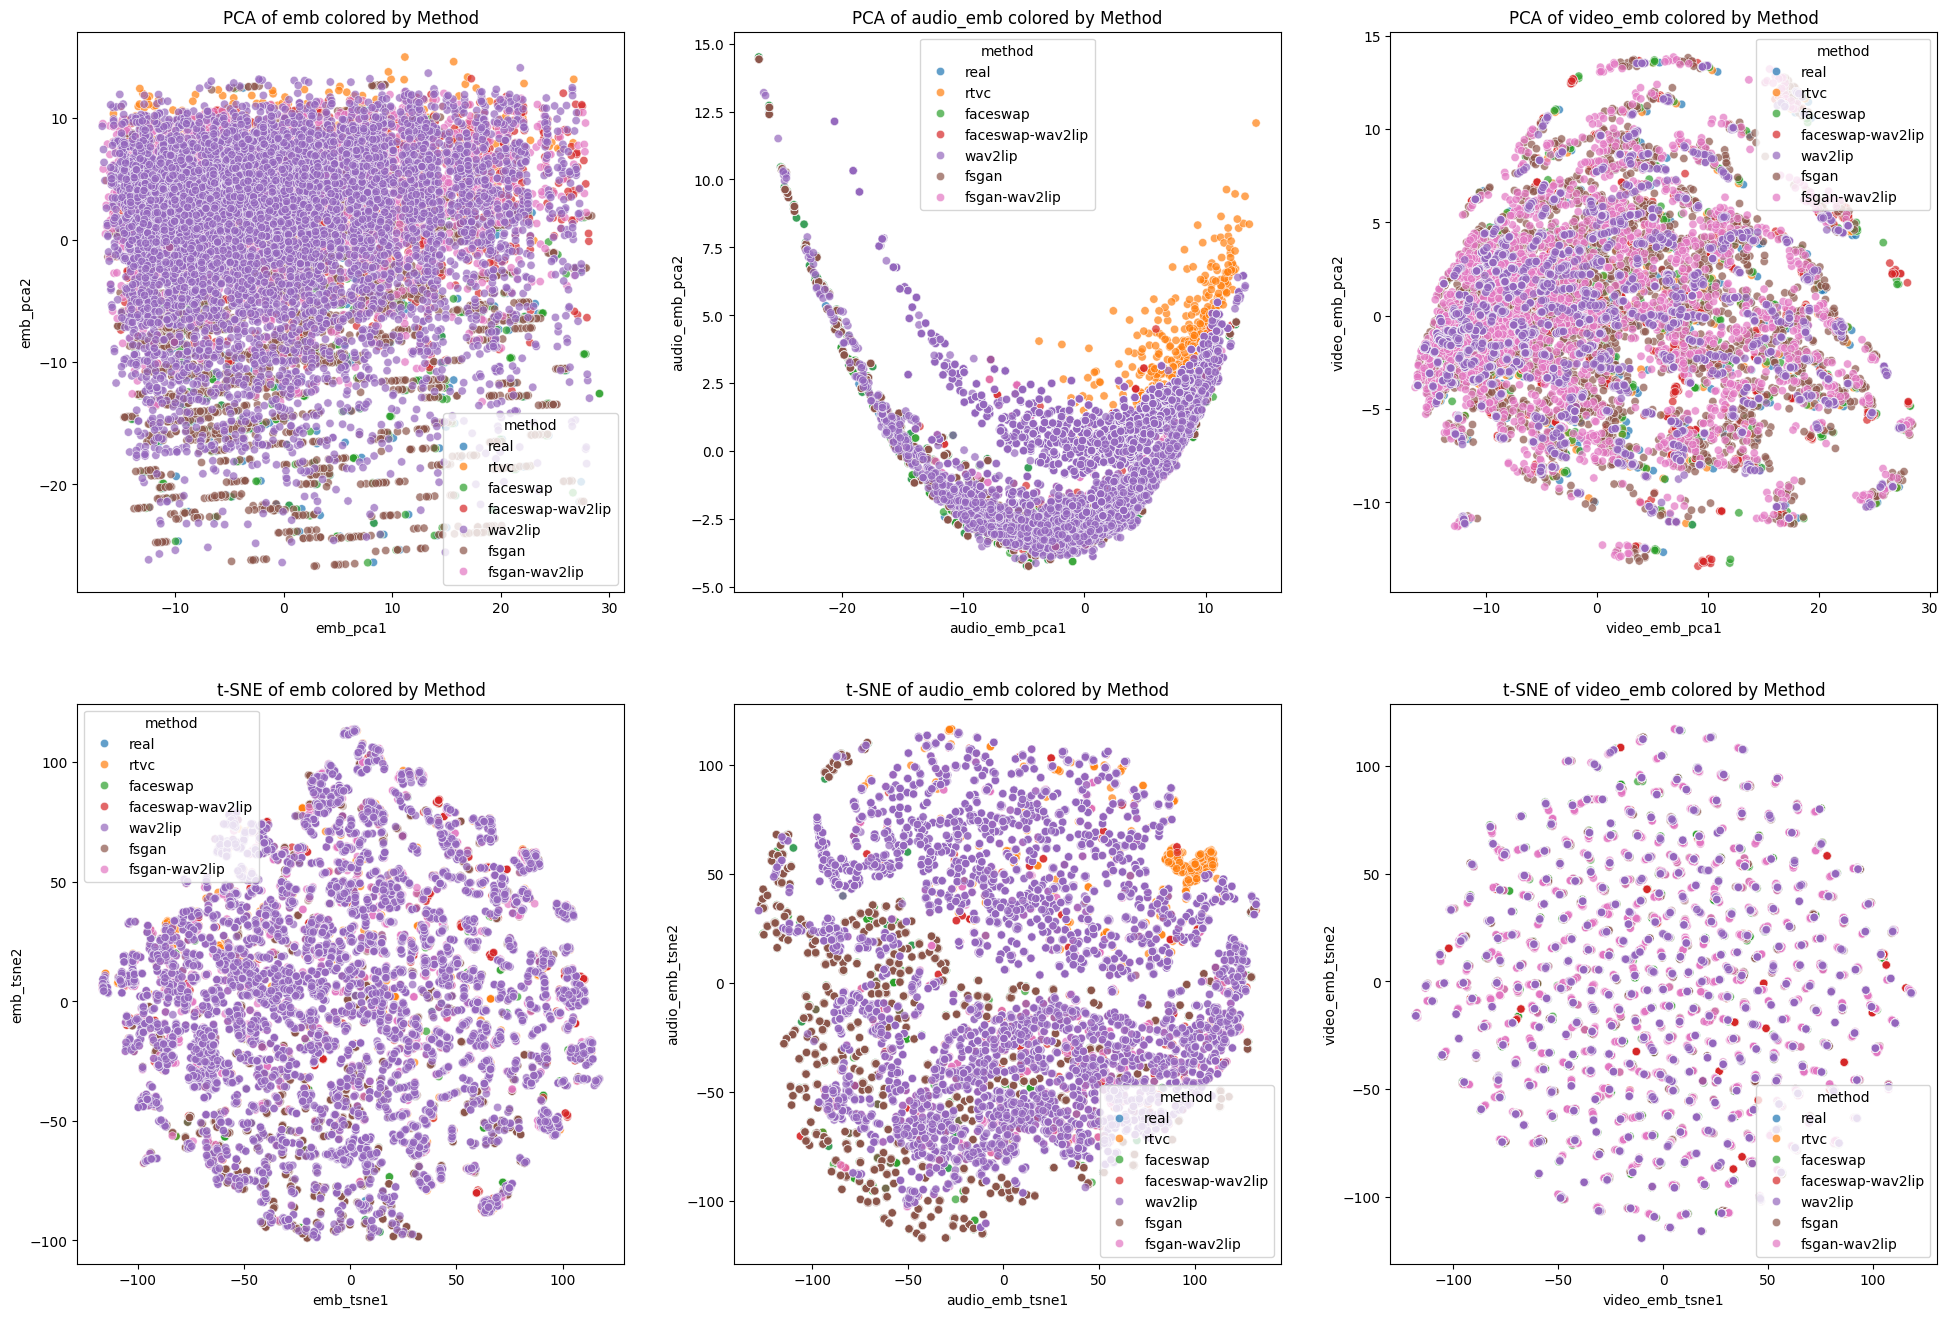

In [23]:
pca = PCA(n_components=2, random_state=42)
tsne = TSNE(n_components=2, random_state=42)

fig, ax = plt.subplots(2, 3, figsize=(24, 16))

for i, embed in enumerate(["emb", "audio_emb", "video_emb"]):
    X = np.array(list(df[embed]))
    pca_comp = pca.fit_transform(X)
    tsne_comp = tsne.fit_transform(X)
    df[f"{embed}_pca1"] = pca_comp[:, 0]
    df[f"{embed}_pca2"] = pca_comp[:, 1]
    df[f"{embed}_tsne1"] = tsne_comp[:, 0]
    df[f"{embed}_tsne2"] = tsne_comp[:, 1]

    sns.scatterplot(data=df, x=f"{embed}_pca1", y=f"{embed}_pca2", hue="method", ax=ax[0][i], alpha=0.7)
    sns.scatterplot(data=df, x=f"{embed}_tsne1", y=f"{embed}_tsne2", hue="method", ax=ax[1][i], alpha=0.7)
    ax[0][i].set_title(f"PCA of {embed} colored by Method")
    ax[1][i].set_title(f"t-SNE of {embed} colored by Method")

plt.show()

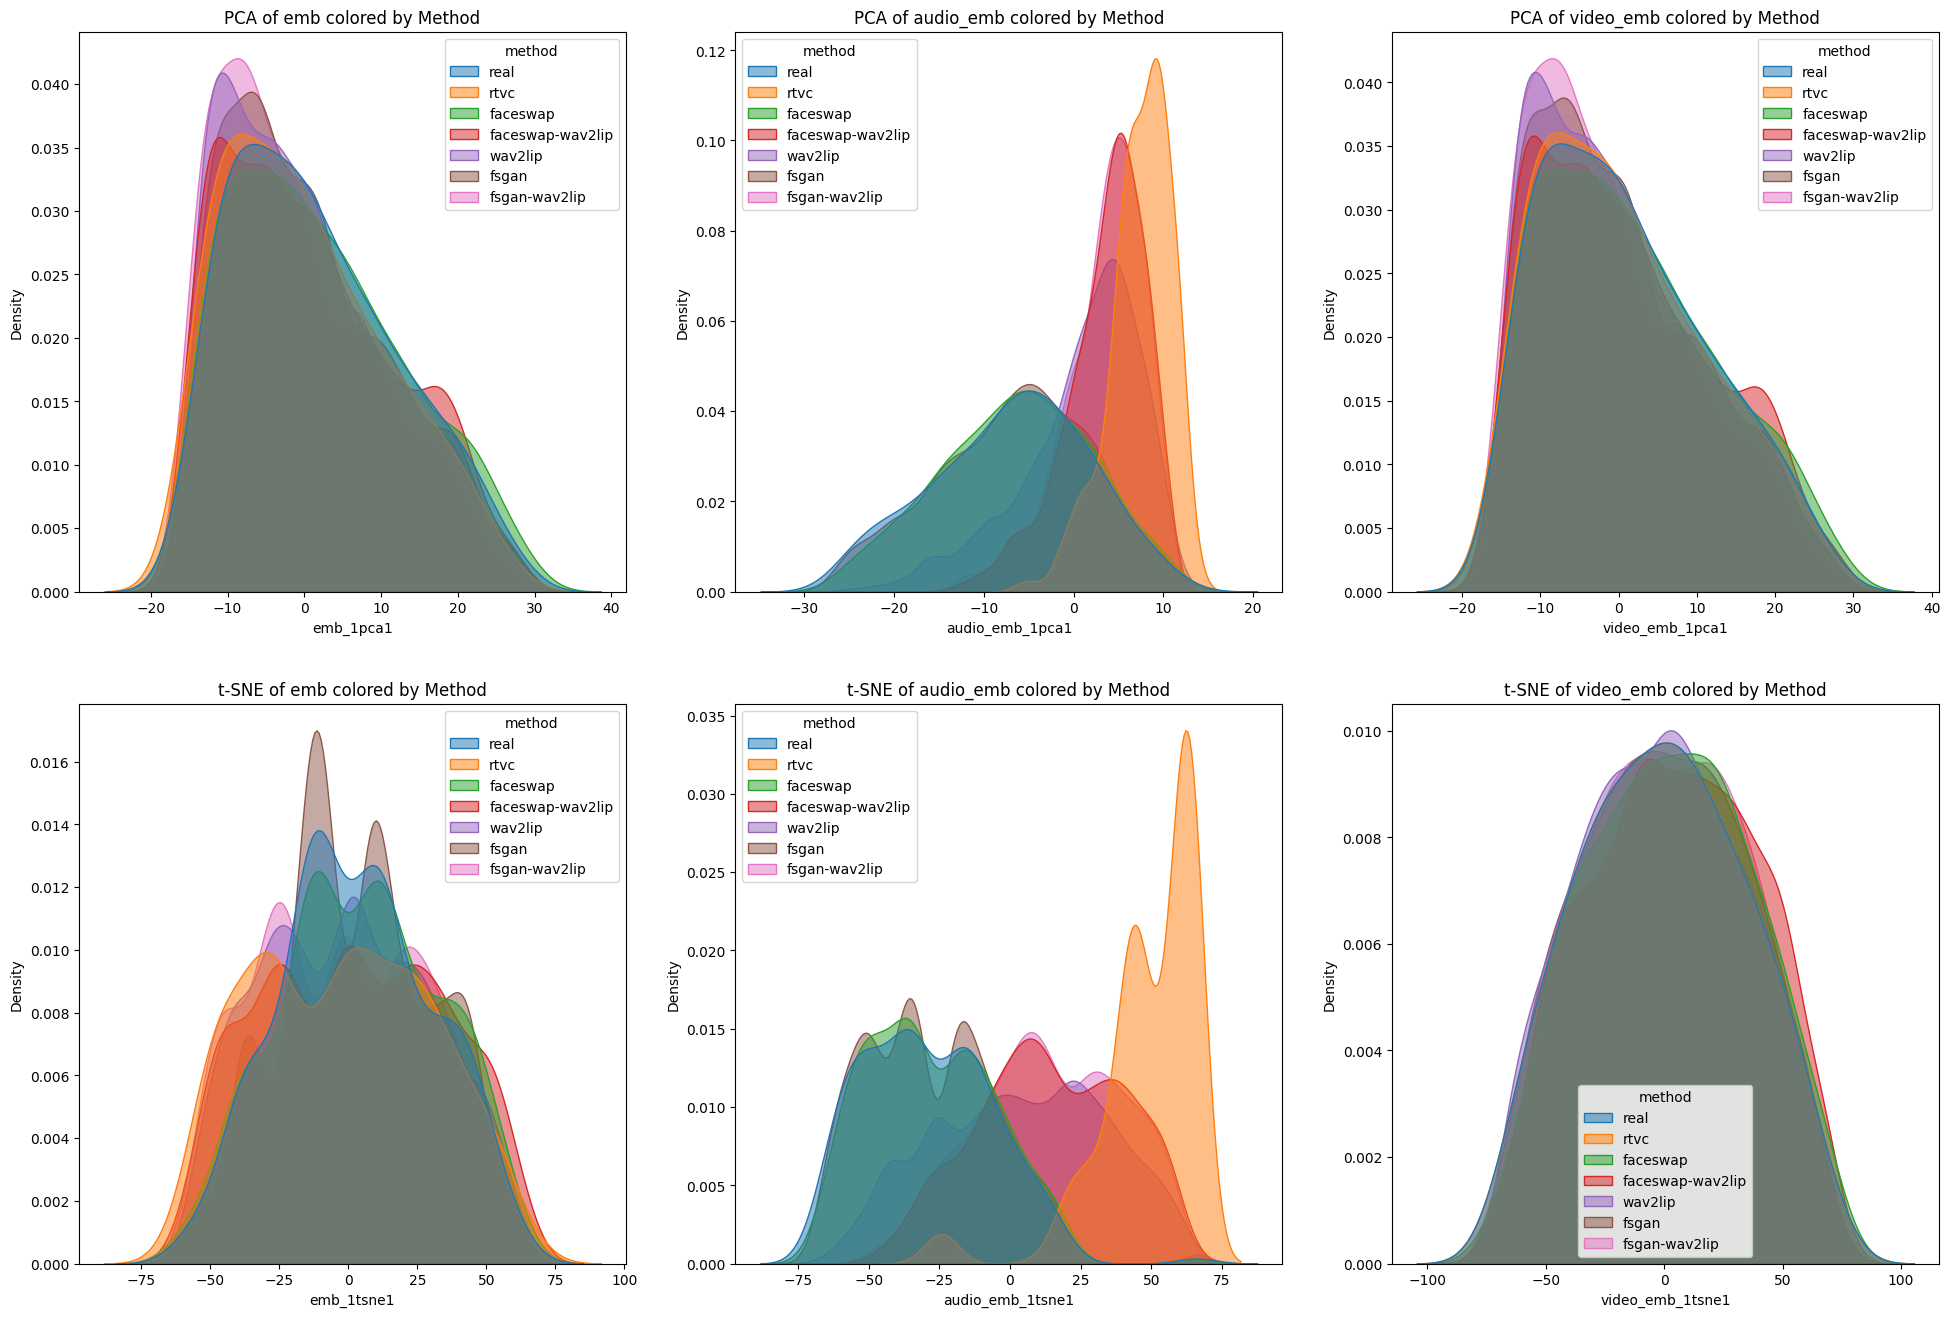

In [24]:
pca = PCA(n_components=1, random_state=42)
tsne = TSNE(n_components=1, random_state=42, perplexity=30, max_iter=500)

fig, ax = plt.subplots(2, 3, figsize=(24, 16))

for i, embed in enumerate(["emb", "audio_emb", "video_emb"]):
    X = np.array(list(df[embed]))
    pca_comp = pca.fit_transform(X)
    tsne_comp = tsne.fit_transform(X)
    df[f"{embed}_1pca1"] = pca_comp[:, 0]
    df[f"{embed}_1tsne1"] = tsne_comp[:, 0]

    sns.kdeplot(data=df, x=f"{embed}_1pca1", hue="method", fill=True, common_norm=False, alpha=0.5, ax=ax[0][i])
    sns.kdeplot(data=df, x=f"{embed}_1tsne1", hue="method", fill=True, common_norm=False, alpha=0.5, ax=ax[1][i])
    ax[0][i].set_title(f"PCA of {embed} colored by Method")
    ax[1][i].set_title(f"t-SNE of {embed} colored by Method")

plt.show()

### PCA fit on real only

In [25]:
# fit pca only on real ones
df.head()
# fit
pca = PCA(n_components=2)
reals = list(df[df["method"] == "real"]["emb"])
pca.fit(reals)
# transform
df["pca1_real"] = pca.transform(df["emb"].to_list())[:, 0]
df["pca2_real"] = pca.transform(df["emb"].to_list())[:, 1]

In [10]:
fig = px.scatter(df, x="pca1_real", y="pca2_real", color="method", hover_data=["video_name"], opacity=0.8, width=800, height=600)
fig.update_layout(title="PCA of Audio concat Video Embeddings colored by Method")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['video_name', 'audio_emb', 'video_emb', 'emb', 'source', 'target1', 'target2', 'method', 'category', 'type', 'race', 'gender', 'path', 'label'] but received: pca1_real

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit_transform(df["emb"].to_list(), df["method"].to_list())
df["lda1"] = lda.transform(df["emb"].to_list())[:, 0]
df["lda2"] = lda.transform(df["emb"].to_list())[:, 1]

In [13]:
fig = px.scatter(df, x="lda1", y="lda2", color="method", hover_data=["video_name"], opacity=0.8, width=1000, height=800)
fig.update_layout(title="LDA of Audio concat Video Embeddings colored by Method")
fig.show()


In [16]:
# also do for language
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit_transform(df["emb"].to_list(), df["race"].to_list())
df["lda_race1"] = lda.transform(df["emb"].to_list())[:, 0]
df["lda_race2"] = lda.transform(df["emb"].to_list())[:, 1]
fig = px.scatter(df, x="lda_race1", y="lda_race2", color="race", hover_data=["video_name"], opacity=0.8, width=1000, height=800)
fig.update_layout(title="LDA of Audio concat Video Embeddings colored by Race")
fig.show()

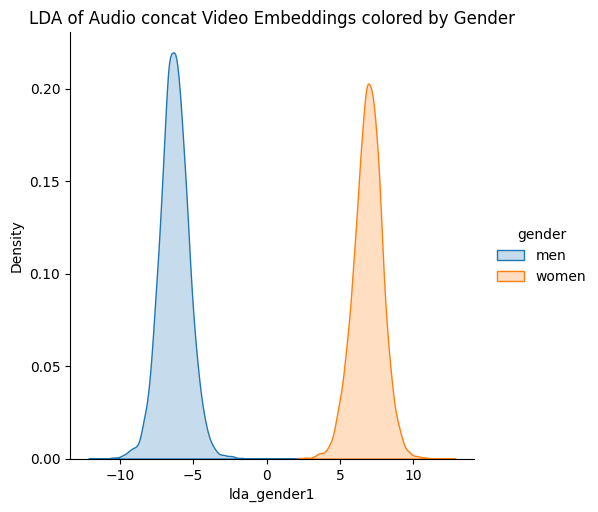

In [23]:
# also do for language
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit_transform(df["emb"].to_list(), df["gender"].to_list())
df["lda_gender1"] = lda.transform(df["emb"].to_list())[:, 0]
fig = sns.displot(df, x="lda_gender1", hue="gender", kind="kde", fill=True)
plt.title("LDA of Audio concat Video Embeddings colored by Gender")
plt.show()

### Anomaly Detection

In [29]:
df["emb"] = df["emb"].apply(lambda x: np.array(x, dtype=np.float32))

X = np.stack(df["emb"].values)
labels = df["method"].values

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split

# X: (N, 1536) embeddings; y_test: 0=real, 1=fake for evaluation only
X_real = df[df["method"] == "real"]["emb"].to_list()
X_fake = df[df["method"] != "real"]["emb"].to_list()
# sample one half of real samples in train
X_train, X_test, y_train, y_test = train_test_split(X_real, [0]*len(X_real), test_size=0.5, random_state=42)
X_test += X_fake
y_test += [1]*len(X_fake)

In [31]:
# pipeline: scale -> (optional) PCA -> one-class SVM
scaler = StandardScaler().fit(X_real)
Xr = scaler.transform(X_real)
Xt = scaler.transform(X_test)

pca = PCA(n_components=0.95, svd_solver='full').fit(Xr)   # keep 95% variance
Xr_p = pca.transform(Xr); Xt_p = pca.transform(Xt)

ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05) # nu ≈ expected outlier rate in real-set
ocsvm.fit(Xr_p)

# decision_function: larger = more normal (inlier)
scores_normal = ocsvm.decision_function(Xt_p).ravel()
# flip so that larger = more fake (outlier)
scores_fake = -scores_normal

print("ROC-AUC:", roc_auc_score(y_test, scores_fake))
print("PR-AUC:", average_precision_score(y_test, scores_fake))

# choose threshold for a target FPR (e.g., 5%) using real-only validation:
val_scores = -ocsvm.decision_function(Xr_p).ravel()
thr = np.quantile(val_scores, 0.95)  # 5% of real flagged as fake
y_hat = (scores_fake >= thr).astype(int)


ROC-AUC: 0.6403911101342256
PR-AUC: 0.993847235862371


In [32]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(n_estimators=300, max_samples='auto', random_state=42)
iso.fit(Xr_p)  # train on real only

# higher = more abnormal if we flip sign of score_samples
scores_fake = -iso.score_samples(Xt_p)
print("ROC-AUC:", roc_auc_score(y_test, scores_fake))
print("AP:", average_precision_score(y_test, scores_fake))


ROC-AUC: 0.6946203357939935
AP: 0.9942984763361751


In [33]:
from sklearn.metrics import roc_auc_score

pca = PCA(n_components=0.95, svd_solver='full').fit(Xr)
Xr_rec = pca.inverse_transform(pca.transform(Xr))
Xt_rec = pca.inverse_transform(pca.transform(Xt))

def mse(a,b): return ((a-b)**2).mean(axis=1)
scores_fake = mse(Xt, Xt_rec)  # higher error => more fake
print("ROC-AUC:", roc_auc_score(y_test, scores_fake))
print("AP:", average_precision_score(y_test, scores_fake))


ROC-AUC: 0.7666887635045975
AP: 0.9964383363446472


In [35]:
from sklearn.covariance import LedoitWolf
mu = Xr.mean(axis=0, keepdims=True)
lw = LedoitWolf().fit(Xr - mu)
# Squared Mahalanobis distance
diff = Xt - mu
scores_fake = np.einsum('ij,jk,ik->i', diff, lw.precision_, diff)
print("ROC-AUC:", roc_auc_score(y_test, scores_fake))
print("AP:", average_precision_score(y_test, scores_fake))

ROC-AUC: 0.9133544792667747
AP: 0.9989120453035601


In [29]:
from vae import run_cross_modal

df["target"] = df["method"].apply(lambda x: 0 if x == "real" else 1)

run_cross_modal(df, "video_emb", "audio_emb", "target", max_epochs=100, val_frac=0.2, test_frac=0.2, lr=1e-3, hidden=(512, 256), batch_size=1024)

Seed set to 42
/storage/slurm/schnackl/fakesync/myVenv/.venv/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /storage/slurm/schnackl/fakesync/myVenv/.venv/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A2000 12GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type             | Params | Mode 
--------------------------------------------------
0 | f

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/storage/slurm/schnackl/fakesync/myVenv/.venv/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


=== Cross-Modal Anomaly Detection (held-out reals + all fakes) ===
ROC-AUC (score): 0.607171
AP (score): 0.996488
ROC-AUC (mse_va): 0.668666
AP (mse_va): 0.997028
ROC-AUC (mse_av): 0.532463
AP (mse_av): 0.995538
n_test: 14816
n_fakes: 14747
n_reals: 69


{'model': CrossModalTranslator(
   (f_va): MLP(
     (net): Sequential(
       (0): Linear(in_features=768, out_features=512, bias=True)
       (1): ReLU()
       (2): Dropout(p=0.0, inplace=False)
       (3): Linear(in_features=512, out_features=256, bias=True)
       (4): ReLU()
       (5): Dropout(p=0.0, inplace=False)
       (6): Linear(in_features=256, out_features=768, bias=True)
     )
   )
   (f_av): MLP(
     (net): Sequential(
       (0): Linear(in_features=768, out_features=512, bias=True)
       (1): ReLU()
       (2): Dropout(p=0.0, inplace=False)
       (3): Linear(in_features=512, out_features=256, bias=True)
       (4): ReLU()
       (5): Dropout(p=0.0, inplace=False)
       (6): Linear(in_features=256, out_features=768, bias=True)
     )
   )
   (mse): MSELoss()
   (cos): CosineSimilarity()
 ),
 'V_mu': tensor([[-3.3355e-01, -5.4108e-01,  1.8152e-01, -2.2133e-02,  2.4443e-01,
           1.5060e-01,  8.4602e-01,  8.7145e-01, -2.7198e-01, -2.1802e-01,
           2.2009e-